# 11장. 데이터다루기_파마인디언 당뇨병 발병 예측
* 피마 인디언 데이터 분석하기(당뇨병)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#피마 인디언 당뇨병 데이터셋을 불러옵니다.
#불러올때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('../data/pima-indians-diabetes.csv',
                names = ['pregnant', 'plasma', 'pressure', 'thickness', 
                         'insulin', 'BMI', 'pedigree', 'age', 'class'])

In [12]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


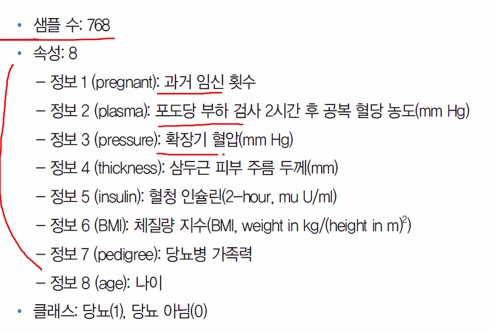

In [14]:
from IPython.display import Image 
Image("../data/02223.jpg")

In [15]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [16]:
print(df[['pregnant', 'class']])

     pregnant  class
0           6      1
1           1      0
2           8      1
3           1      0
4           0      1
..        ...    ...
763        10      0
764         2      0
765         5      0
766         1      1
767         1      0

[768 rows x 2 columns]


In [21]:
#임신횟수당 당뇨병 발병 확률
print(df[['pregnant', 'class']].groupby(['pregnant'], 
       as_index=False).mean().sort_values(by='pregnant',ascending=True))
#as_index=False:새로운인덱스 만듦

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


<AxesSubplot:>

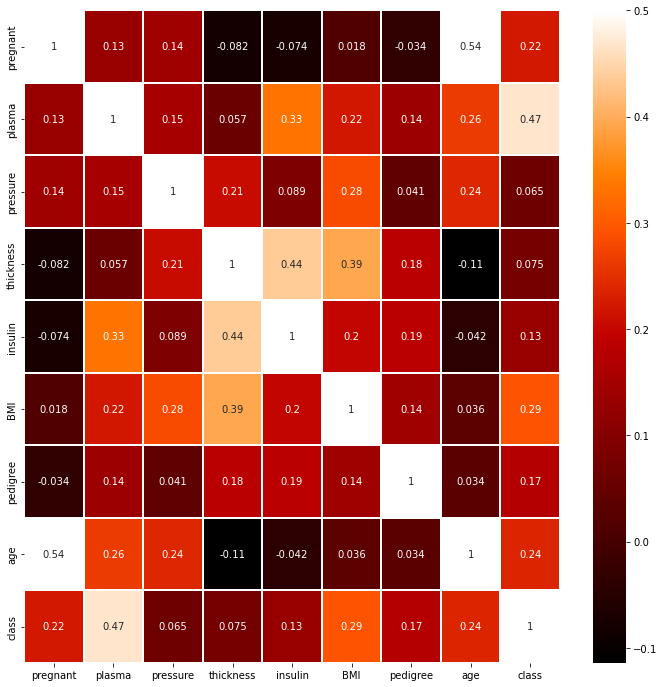

In [24]:
#그래프로 표현하기
plt.figure(figsize=(12,12)) #그래프 크기 결정함
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat,
           linecolor='white', annot=True)
#colormap=plt.cm.gist_heat:그래프색상, clolormap과 cmap는 같은 표현
#vmax의 값을 0.5로 지정해 0.5에 가까울수록 밝은색으로 표시하게 됩니다.

* class와 공복혈당 농도인 plasma가 가장 상관관계 높음, 이것만 떼서 한번 보자

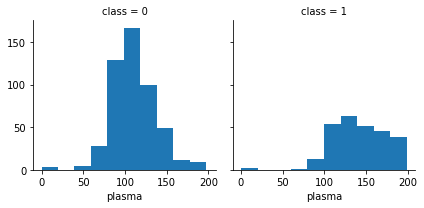

In [25]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

* 결과에 미치는 영향이 큰 항목을 발견하는 것이 데이터 전처리 과정의 한 예이다.
* 데이터 전처리 과정은 딥러닝을 비롯하여 모든 머신러닝의 성능 향상

In [31]:
# 당뇨병 예측
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

#실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3) #랜덤 테이블 중 몇번째 테이블을 불러와 쓸지를 정함.seed값 변경하면 안됨.
tf.random.set_seed(3) #성능을 보려면 seed값 고정시켜놔야함

#데이터를 불러옵니다.
dataset = numpy.loadtxt('../data/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [35]:
#모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) 
#입력 8개 들어감,은닉층12개(값 나오는것), 12는 출력.
model.add(Dense(8, activation='relu'))
#12개 다음층(어차피 입력으로 들어가니 생략)에 8개나옴
#다음단계 가면서 활성화 함수 써야하는데 relu를 씀
model.add(Dense(1, activation='sigmoid')) 
#8개 입력으로 들어와 마지막 1개로 나옴 (3층 레이어)
#활성화 함수는 sigmoid씀


#모델 컴파일
model.compile(loss='binary_crossentropy',#케라스 손실함수 중 하나(오차함수)
             optimizer='adam', #최적화함수 adam사용
             metrics=['accuracy'])
#Binary classification 즉 클래스가 두 개인 이진 분류 문제에서 사용
#label이 0 또는 1을 값으로 가질 때 사용(나가는값 둘중 하나)



#모델실행
model.fit(X, Y, epochs=200, batch_size=10)
#10개씩 묶어서 200번 돌려주세요

#결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1])) #출력으로 나온 값

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 1.3544 - accuracy: 0.6016
Epoch 2/200
77/77 [==============================] - 0s 969us/step - loss: 0.8486 - accuracy: 0.6758
Epoch 3/200
77/77 [==============================] - 0s 658us/step - loss: 0.7442 - accuracy: 0.6823
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6981 - accuracy: 0.6719
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.6771
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.6745
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6470 - accuracy: 0.6784
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6389 - accuracy: 0.6745
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6823
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6235 - accuracy: 0.6914
Epoch

77/77 [==============================] - 0s 899us/step - loss: 0.5485 - accuracy: 0.7318
Epoch 82/200
77/77 [==============================] - 0s 763us/step - loss: 0.5429 - accuracy: 0.7305
Epoch 83/200
77/77 [==============================] - 0s 816us/step - loss: 0.5439 - accuracy: 0.7318
Epoch 84/200
77/77 [==============================] - 0s 816us/step - loss: 0.5458 - accuracy: 0.7292
Epoch 85/200
77/77 [==============================] - 0s 894us/step - loss: 0.5431 - accuracy: 0.7318
Epoch 86/200
77/77 [==============================] - 0s 837us/step - loss: 0.5421 - accuracy: 0.7383
Epoch 87/200
77/77 [==============================] - 0s 1000us/step - loss: 0.5435 - accuracy: 0.7409
Epoch 88/200
77/77 [==============================] - 0s 750us/step - loss: 0.5449 - accuracy: 0.7305
Epoch 89/200
77/77 [==============================] - 0s 908us/step - loss: 0.5454 - accuracy: 0.7448
Epoch 90/200
77/77 [==============================] - 0s 816us/step - loss: 0.5430 - accuracy:

77/77 [==============================] - 0s 974us/step - loss: 0.5058 - accuracy: 0.7630
Epoch 162/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5060 - accuracy: 0.7630
Epoch 163/200
77/77 [==============================] - 0s 908us/step - loss: 0.5039 - accuracy: 0.7617
Epoch 164/200
77/77 [==============================] - 0s 776us/step - loss: 0.5042 - accuracy: 0.7695
Epoch 165/200
77/77 [==============================] - 0s 908us/step - loss: 0.5050 - accuracy: 0.7643
Epoch 166/200
77/77 [==============================] - 0s 895us/step - loss: 0.5047 - accuracy: 0.7604
Epoch 167/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5016 - accuracy: 0.7669
Epoch 168/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.7552
Epoch 169/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7578
Epoch 170/200
77/77 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0

* 약 77.86%의 예측정확도를 보입니다.

In [36]:
print((X, Y)[0]) #입력으로 들어간 값

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [37]:
model.fit(X, Y, epochs=200, batch_size=10, verbose=0)
#verbose=0 돌아가는 과정 안보고 싶을때 

In [38]:
predict = model.predict(X).flatten()
print('Target:', Y)
print('Predict:', predict)

Target: [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 